## Lab 7: Numerical Differentiation and Integration

### Numerical Differentiation Techniques

#### 1. Forward Difference (n+1 formula)

This method approximates the derivative using the function values at the point of interest and one point ahead.

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

Where:
- $f(x)$ is the function whose derivative we want to approximate.
- $h$ is a small step size.

#### 2. Three-Point Formula

This method uses three points to approximate the derivative. It is often a higher-order accurate method.

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

Where:
- $f(x)$ is the function whose derivative we want to approximate.
- $h$ is a small step size.


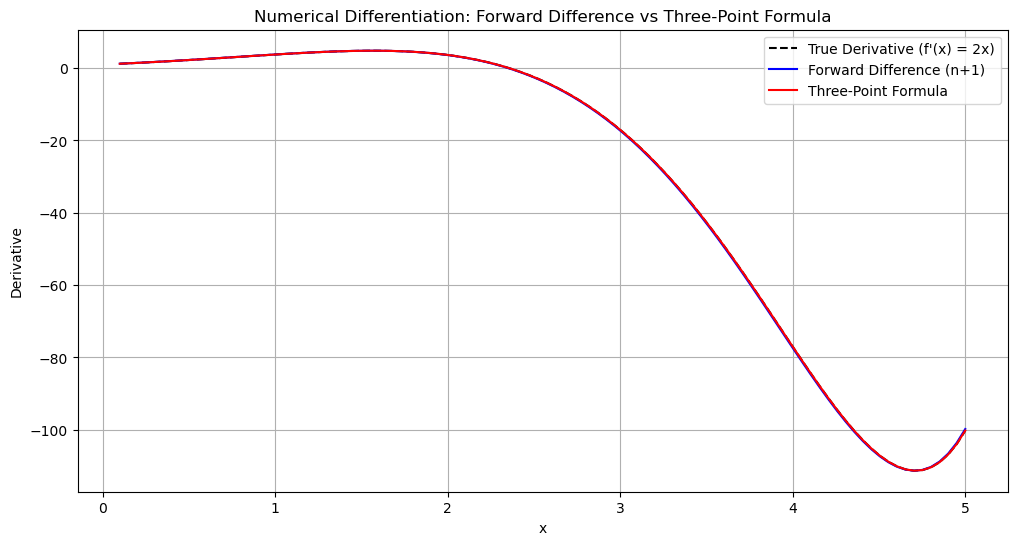

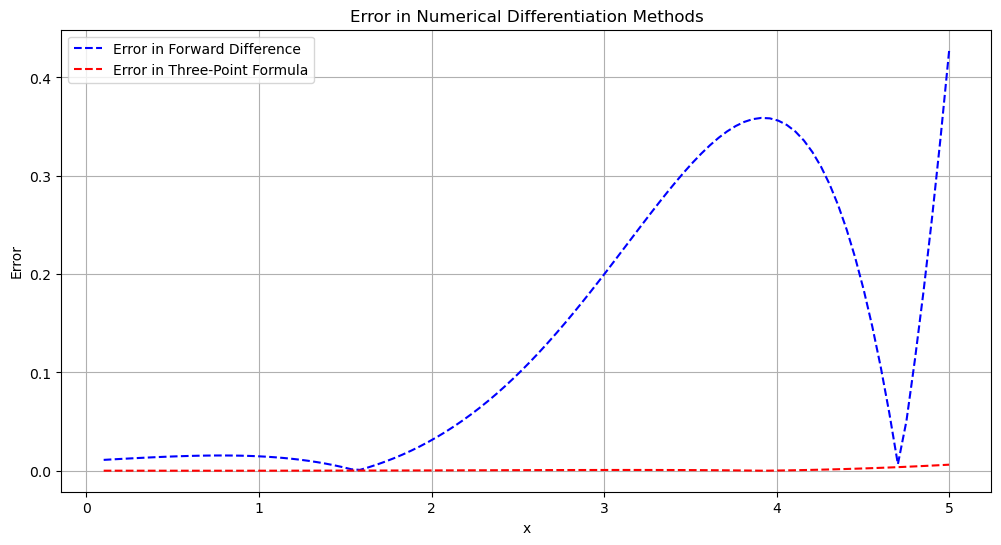

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Forward difference (n+1 formula)
def forward_difference(f, x, h):
    """
    Approximate the derivative of f at x using the forward difference formula.
    f: function to differentiate
    x: point at which to evaluate the derivative
    h: step size
    """
    return (f(x + h) - f(x)) / h

# Three-point central difference formula
def three_point_formula(f, x, h):
    """
    Approximate the derivative of f at x using the three-point formula.
    f: function to differentiate
    x: point at which to evaluate the derivative
    h: step size
    """
    return (f(x + h) - f(x - h)) / (2 * h)

# True derivative of f(x) = e^x * sin(x)
def true_derivative(x):
    return np.exp(x) * np.sin(x) + np.exp(x) * np.cos(x)

# Define a more complex function to differentiate: f(x) = e^x * sin(x)
def f(x):
    return np.exp(x) * np.sin(x)

# Range of x values for plotting
x_values = np.linspace(0.1, 5, 100)
h = 0.01  # Step size for numerical differentiation

# Compute the true derivatives
true_values = true_derivative(x_values)

# Compute the forward difference and three-point formula results
forward_values = forward_difference(f, x_values, h)
three_point_values = three_point_formula(f, x_values, h)

# Compute the errors
forward_error = np.abs(true_values - forward_values)
three_point_error = np.abs(true_values - three_point_values)

# Plot the numerical derivatives and the true derivative
plt.figure(figsize=(12, 6))

# Plot True Derivative
plt.plot(x_values, true_values, label="True Derivative (f'(x) = 2x)", color='black', linestyle='--')

# Plot Forward Difference (n+1 formula)
plt.plot(x_values, forward_values, label="Forward Difference (n+1)", color='blue')

# Plot Three-Point Formula
plt.plot(x_values, three_point_values, label="Three-Point Formula", color='red')

# Customize the plot
plt.title('Numerical Differentiation: Forward Difference vs Three-Point Formula')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True)
plt.show()

# Plot the errors
plt.figure(figsize=(12, 6))

# Plot Error for Forward Difference
plt.plot(x_values, forward_error, label="Error in Forward Difference", color='blue', linestyle='--')

# Plot Error for Three-Point Formula
plt.plot(x_values, three_point_error, label="Error in Three-Point Formula", color='red', linestyle='--')

# Customize the error plot
plt.title('Error in Numerical Differentiation Methods')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


### Numerical Integration: Trapezoidal Rule

The **Trapezoidal Rule** is a numerical method for approximating the integral of a function. The rule approximates the area under a curve by dividing it into trapezoids, providing a more accurate approximation compared to the rectangle rule.

#### Trapezoidal Rule Formula

For a given interval $[a, b]$ and a function $f(x)$, the integral is approximated as:

$$
I \approx \int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

Where:
- $h = \frac{b - a}{n}$ is the step size (the width of each subinterval).
- $n$ is the number of subintervals.
- $x_i$ are the points in the interval $[a, b]$, given by $x_i = a + i \cdot h$ for $i = 1, 2, ..., n-1$.


Approximate integral of f(x) = x^2 from 0 to 1 is: 0.33335000000000004
Exact integral is: 0.3333333333333333


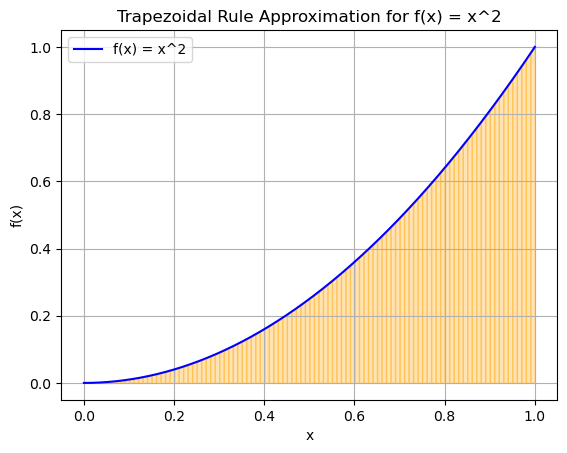

Error in Trapezoidal Rule Approximation: 1.6666666666720342e-05


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Trapezoidal Rule Implementation
def trapezoidal_rule(f, a, b, n):
    """
    Approximate the integral of f(x) from a to b using the Trapezoidal Rule.
    f: function to integrate
    a: lower bound of integration
    b: upper bound of integration
    n: number of subintervals
    """
    # Step size
    h = (b - a) / n
    
    # Compute the sum using the trapezoidal rule
    integral = 0.5 * (f(a) + f(b))  # First and last terms
    for i in range(1, n):
        integral += f(a + i * h)  # Middle terms

    # Multiply by the step size
    integral *= h
    
    return integral

# Define a function to integrate, for example f(x) = x^2
def f(x):
    return x**2

# Set the bounds and the number of subintervals
a = 0  # Lower bound
b = 1  # Upper bound
n = 100  # Number of subintervals

# Compute the integral using the Trapezoidal Rule
result = trapezoidal_rule(f, a, b, n)
print(f"Approximate integral of f(x) = x^2 from {a} to {b} is: {result}")

# Compare with the exact integral
exact_integral = (b**3 - a**3) / 3  # Exact integral of x^2 from a to b
print(f"Exact integral is: {exact_integral}")


# Plot the function and the trapezoidal approximation
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label="f(x) = x^2", color='blue')

# Plot the trapezoids
x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)
for i in range(n):
    plt.fill_between(x_trap[i:i+2], y_trap[i:i+2], alpha=0.3, color='orange')

# Add labels and legend
plt.title('Trapezoidal Rule Approximation for f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error
error = abs(result - exact_integral)
print(f"Error in Trapezoidal Rule Approximation: {error}")
